In [190]:
import pandas as pd
import seaborn
import pylab as plt
import numpy as np
from pandas.api.types import is_numeric_dtype

In [191]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

# Attempt to extract through location 
I try to extract numerical column and the categorical column to be used to make the groupby.
I fail trying to merge those Dataframe because they do not share any index or column.

In [259]:
is_number = np.vectorize(lambda x: is_numeric_dtype(x))
num_cols = is_number(iris.dtypes) #Extracting the booleand mask for numerical columns in the DataFrame
numeric_columns_df = iris.iloc[:,num_cols] #Extracting numerical columns
grouping_column_df = iris.loc[:,'species'] #Ectracting the Column I want to use to make the grouping

#I DON'T KNOW OVER WHICH VALUE I SHOULD MANAGE THE MERGING
#pd.merge(grouping_column_df, numeric_columns_df, on='index', how='left')

# Is good but there isn't the *'species'* column
If I do this way I lose the information about the species.
If I try to make the groupby using "as_index = False" it raises error because it keepS a non numerical column which it is not compatible with the lambda function used to normalize the data

In [249]:
stdz_iris = iris.groupby('species').apply(lambda x: (x - np.mean(x))/np.std(x))
stdz_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.269382,0.191870,-0.360636,-0.440924
1,-0.303771,-1.140559,-0.360636,-0.440924
2,-0.876924,-0.607588,-0.942306,-0.440924
3,-1.163501,-0.874073,0.221035,-0.440924
4,-0.017195,0.458355,-0.360636,-0.440924


In [250]:
stdz_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.570596e-15,-9.858780e-16,-2.590520e-17,8.200847e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-2.681541e+00,-3.005959e+00,-2.708582e+00,-2.302404e+00
25%,-6.472601e-01,-6.075875e-01,-7.414799e-01,-4.634232e-01
50%,-1.719459e-02,8.143950e-02,8.785611e-02,-1.328122e-01
75%,5.559584e-01,7.078972e-01,7.074045e-01,8.266064e-01
max,2.275417e+00,2.590242e+00,2.547718e+00,3.393196e+00


(array([ 3., 14., 19., 53., 20., 21., 13.,  4.,  2.,  1.]),
 array([-2.30240439, -1.73284431, -1.16328423, -0.59372416, -0.02416408,
         0.545396  ,  1.11495608,  1.68451615,  2.25407623,  2.82363631,
         3.39319638]),
 <a list of 10 Patch objects>)

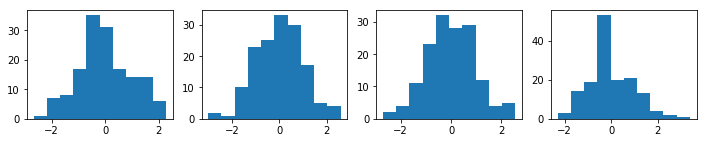

In [269]:
#Very poor plots
fig, axes = plt.subplots(ncols=4, figsize=(12,2))
axes[0].hist('sepal_length', data=stdz_iris)
axes[1].hist('sepal_width', data=stdz_iris)
axes[2].hist('petal_length', data=stdz_iris)
axes[3].hist('petal_width', data=stdz_iris)

# Attempt going through different group
I would have liked to apply the lambda function to every group but I wasn't able to obtain nothing.
 * which is the difference between `pandas.core.frame.DataFrame` and normale `pandas.DataFrame`???
 * Why I can't see any modifiction?

In [257]:
gr_iris = iris.groupby('species', as_index=False)
for key, group in gr_iris:
    print(type(group))
    group = group._get_numeric_data().apply(lambda x: (x - np.mean(x))/np.std(x)) #Why it's not modified
gr_iris.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


## Can I use `_get_numeric_data`?
Can I safely use a method with the `_`?

In [258]:
iris._get_numeric_data().apply(lambda x: (x - np.mean(x))/np.std(x)).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
